# CS 316 : Introduction to Deep Learning - Fall 2024
## Lab 10 : Convolutional Neural Networks
### Dr. Abdul Samad

# Instructions

1. Make a copy of this notebook on google colab at start of the lab.

2. Please rename your notebook as *Lab_10_aa12345.ipynb* before starting the lab. Notebooks which do not follow appropriate naming convention will not be graded.

3. You have to submit this lab during the lab timings. You are allowed to submit till 11:59 PM on the day of your lab with a 30% penalty. No submissions will be accepted afterwards.

4. At the end of the lab, download the notebook (ipynb extension file) and upload it on canvas as a file. Submitting link to notebook or any other file will not be accepted.

5. Each task has points assigned to it. Total Lab is of 100 points.

6. Use of for loops is strictly prohibited.

7. For every theoretical question, there is a separate cell given at the end. You have to write your answer there.

8. If you have any questions, please feel free to reach out to the course instructor or RA.

## Task Overview


In this lab we will work on CNNs. This Lab is going to be short. Work through the cells below, running each cell in turn. In various places you will see the words "TODO". Follow the instructions at these places and make predictions about what is going to happen or write code to complete the functions.

Let's start with importing Libraries first

In [ ]:
import torch
import torch.nn as nn
import torchvision
from torch.autograd import Variable
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
import random

# **Convolution for MNIST**

This notebook builds a proper network for 2D convolution.  It works with the MNIST dataset , which was the original classic dataset for classifying images.  The network will take a 28x28 grayscale image and classify it into one of 10 classes representing a digit.



In [ ]:
# Run this once to load the train and test data straight into a dataloader class
# that will provide the batches

# (It may complain that some files are missing because the files seem to have been
# reorganized on the underlying website, but it still seems to work). If everything is working
# properly, then the whole notebook should run to the end without further problems
# even before you make changes.
batch_size_train = 64
batch_size_test = 1000
train_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('/files/', train=True, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=batch_size_train, shuffle=True)

test_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('/files/', train=False, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=batch_size_test, shuffle=True)

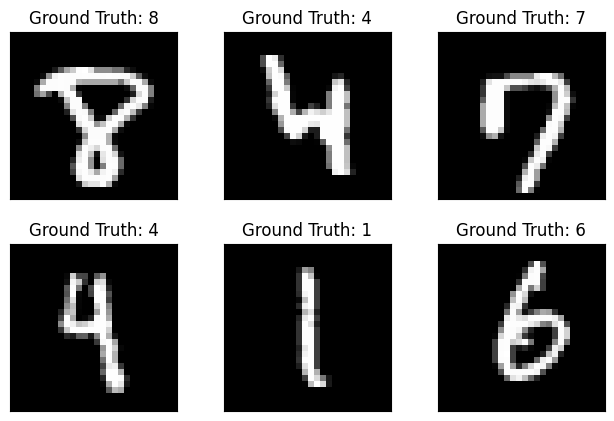

In [ ]:
# Let's draw some of the training data
examples = enumerate(test_loader)
batch_idx, (example_data, example_targets) = next(examples)

fig = plt.figure()
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.tight_layout()
  plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
  plt.title("Ground Truth: {}".format(example_targets[i]))
  plt.xticks([])
  plt.yticks([])
plt.show()

Define the network.  This is a more typical way to define a network than the sequential structure.  We define a class for the network, and define the parameters in the constructor.  Then we use a function called forward to actually run the network.  It's easy to see how you might use residual connections in this format.

# Q1: TODO [30 Points]

Build this network architecture by completing the function given below.
1. A valid convolution with kernel size 5, 1 input channel and 10 output channels
2. A max pooling operation over a 2x2 area
3. A Relu
4. A valid convolution with kernel size 5, 10 input channels and 20 output channels
5. A 2D Dropout layer
6. A max pooling operation over a 2x2 area
7. A relu
8. A flattening operation
9. A fully connected layer mapping from (whatever dimensions we are at-- find out using .shape) to 50
10. A ReLU
11. A fully connected layer mapping from 50 to 10 dimensions
12. A softmax function.

In [ ]:


import torch
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.model=nn.Sequential(

            #nn.MaxPool2d( kernel_size=2, stride=2) This code can be used for max pooling. Google it to understand it.
            #nn.Dropout() can be used for dropout
            nn.Conv2d(in_channels=1, out_channels=10, kernel_size=5, padding=0, stride=1),
            nn.MaxPool2d( kernel_size=2, stride=2),
            nn.ReLU(),
            nn.Conv2d(in_channels=10, out_channels=20, kernel_size=5, padding=0, stride=1),
            nn.Dropout2d(),
            nn.MaxPool2d( kernel_size=2, stride=2),
            nn.ReLU(),
            nn.Flatten(),
            nn.Linear(in_features=320, out_features=50),
            nn.ReLU(),
            nn.Linear(in_features=50, out_features=10),
            nn.Softmax()

        )

    def forward(self, x):
        x = self.model(x)
        return x

In [ ]:
#Do NOT EDIT
#USE THIS CODE FOR TESTING
#Since we can't compare the model, its better to look at the its printed structure and compare it with layers given in architecture
net = Net()
print(net)

# Test the network with a random input of shape (batch_size, channels, height, width)
x = torch.randn(16, 1, 28, 28)  # Example batch of 16 samples, 1 channel, 28x28 images
output = net(x)
print(output.shape)  # Output should be (16, 10)

assert output.shape == (16, 10), "Output shape does not match expected shape"


Net(
  (model): Sequential(
    (0): Conv2d(1, 10, kernel_size=(5, 5), stride=(1, 1))
    (1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (2): ReLU()
    (3): Conv2d(10, 20, kernel_size=(5, 5), stride=(1, 1))
    (4): Dropout2d(p=0.5, inplace=False)
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): ReLU()
    (7): Flatten(start_dim=1, end_dim=-1)
    (8): Linear(in_features=320, out_features=50, bias=True)
    (9): ReLU()
    (10): Linear(in_features=50, out_features=10, bias=True)
    (11): Softmax(dim=None)
  )
)
torch.Size([16, 10])


In [ ]:
# Initialization of weights
def weights_init(layer_in):
  if isinstance(layer_in, nn.Linear):
    nn.init.kaiming_uniform_(layer_in.weight)
    layer_in.bias.data.fill_(0.0)

In [ ]:
# Main training routine
def train(epoch):
  model.train()
  # Get each
  for batch_idx, (data, target) in enumerate(train_loader):
    optimizer.zero_grad()
    output = model(data)
    loss = F.nll_loss(output, target)
    loss.backward()
    optimizer.step()
    # Store results
    if batch_idx % 10 == 0:
      print('Train Epoch: {} [{}/{}]\tLoss: {:.6f}'.format(
        epoch, batch_idx * len(data), len(train_loader.dataset), loss.item()))

In [ ]:
# Run on test data
def test():
  model.eval()
  test_loss = 0
  correct = 0
  with torch.no_grad():
    for data, target in test_loader:
      output = model(data)
      test_loss += F.nll_loss(output, target, size_average=False).item()
      pred = output.data.max(1, keepdim=True)[1]
      correct += pred.eq(target.data.view_as(pred)).sum()
  test_loss /= len(test_loader.dataset)
  print('\nTest set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
    test_loss, correct, len(test_loader.dataset),
    100. * correct / len(test_loader.dataset)))

In [ ]:
# Create network
model = Net()
# Initialize model weights
model.apply(weights_init)
# Define optimizer
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.5)

In [ ]:
# Train for three epochs
n_epochs = 3
for epoch in range(1, n_epochs + 1):
  train(epoch)
  test()

Train Epoch: 1 [0/60000]	Loss: -0.103207
Train Epoch: 1 [640/60000]	Loss: -0.107371
Train Epoch: 1 [1280/60000]	Loss: -0.099983
Train Epoch: 1 [1920/60000]	Loss: -0.107406
Train Epoch: 1 [2560/60000]	Loss: -0.104731
Train Epoch: 1 [3200/60000]	Loss: -0.127310
Train Epoch: 1 [3840/60000]	Loss: -0.146569
Train Epoch: 1 [4480/60000]	Loss: -0.118514
Train Epoch: 1 [5120/60000]	Loss: -0.137689
Train Epoch: 1 [5760/60000]	Loss: -0.168405
Train Epoch: 1 [6400/60000]	Loss: -0.122546
Train Epoch: 1 [7040/60000]	Loss: -0.203514
Train Epoch: 1 [7680/60000]	Loss: -0.196255
Train Epoch: 1 [8320/60000]	Loss: -0.161864
Train Epoch: 1 [8960/60000]	Loss: -0.262733
Train Epoch: 1 [9600/60000]	Loss: -0.216955
Train Epoch: 1 [10240/60000]	Loss: -0.237677
Train Epoch: 1 [10880/60000]	Loss: -0.238207
Train Epoch: 1 [11520/60000]	Loss: -0.272051
Train Epoch: 1 [12160/60000]	Loss: -0.229518
Train Epoch: 1 [12800/60000]	Loss: -0.287223
Train Epoch: 1 [13440/60000]	Loss: -0.340536
Train Epoch: 1 [14080/60000]	L

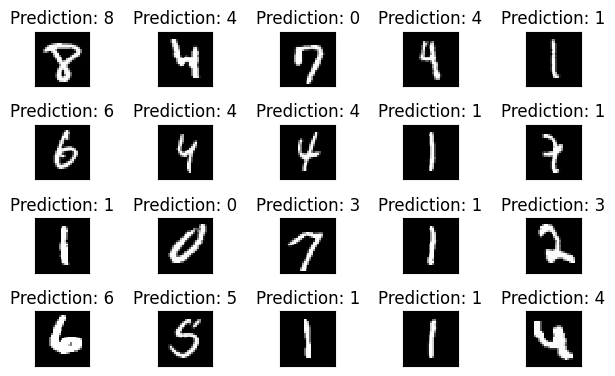

In [ ]:
# Run network on data we got before and show predictions
output = model(example_data)

fig = plt.figure()
for i in range(20):
  plt.subplot(5,5,i+1)
  plt.tight_layout()
  plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
  plt.title("Prediction: {}".format(
    output.data.max(1, keepdim=True)[1][i].item()))
  plt.xticks([])
  plt.yticks([])
plt.show()

# Q2: TODO [45 Points]
You implemented the previous given architecture. Now let's implement a modified version of AlexNet on mnist.

if you don't know what alexnet is, don't worry. This lab doesn't require the background of it. Its just an architecture and we are implementing it.

Here is AlexNet Architecture:
1. Convolution with kernel size 5, stride 1, padding 1, 1 input channel and 32 output channels
2. A Relu
3. Convolution with kernel size 3, padding 1, 32 input channels and 64 output channels
4. A Relu
5. A max pooling operation over a 2x2 area, stride 2
6. Convolution with kernel size 3, padding 1, 64 input channels and 96 output channels
7. A Relu
8. Convolution with kernel size 3, padding 1, 96 input channels and 64 output channels
9. A Relu
10. Convolution with kernel size 3, padding 1, 64 input channels and 32 output channels
11. A Relu
12. A max pooling operation over a 2x2 area, stride 1

13. A flattening operation
14. A dropout
15. A fully connected layer mapping from (whatever dimensions we are at-- find out using .shape) to 2048
16. A ReLU
11. A fully connected layer mapping from 2048 to 1024
16. A ReLU
18. A fully connected layer mapping from 1024 to 10



            


In [ ]:
class Net(nn.Module):
    def __init__(self, num=10):
        super(Net, self).__init__()
        self.model=nn.Sequential(

            #nn.MaxPool2d( kernel_size=2, stride=2) This code can be used for max pooling. Google it to understand it.
            #nn.Dropout() can be used for dropout
            nn.Conv2d(in_channels=1, out_channels=32, kernel_size=5, padding=1, stride=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1, stride=1),
            nn.ReLU(),
            nn.MaxPool2d( kernel_size=2, stride=2),
            nn.Conv2d(in_channels=64, out_channels=96, kernel_size=3, padding=1, stride=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=96, out_channels=64, kernel_size=3, padding=1, stride=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=64, out_channels=32, kernel_size=3, padding=1, stride=1),
            nn.ReLU(),
            nn.MaxPool2d( kernel_size=2, stride=1),
            nn.Flatten(),
            nn.Dropout(),
            nn.Linear(in_features=4608, out_features=2048),
            nn.ReLU(),
            nn.Linear(in_features=2048, out_features=1024),
            nn.ReLU(),

        )

    def forward(self, x):
        x = self.model(x)
        return x

In [ ]:
#Do NOT EDIT
#USE THIS CODE FOR TESTING
#Since we can't compare the model, its better to look at the its printed structure and compare it with layers given in architecture
model = Net()
print(model)

model.apply(weights_init)
if torch.cuda.is_available():
    model.cuda()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.5)


Net(
  (model): Sequential(
    (0): Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 96, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU()
    (7): Conv2d(96, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU()
    (9): Conv2d(64, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (10): ReLU()
    (11): MaxPool2d(kernel_size=2, stride=1, padding=0, dilation=1, ceil_mode=False)
    (12): Flatten(start_dim=1, end_dim=-1)
    (13): Dropout(p=0.5, inplace=False)
    (14): Linear(in_features=4608, out_features=2048, bias=True)
    (15): ReLU()
    (16): Linear(in_features=2048, out_features=1024, bias=True)
    (17): ReLU()
  )
)


In [ ]:
# Main training routine
def train(epoch):
  model.train()
  # Get each
  for batch_idx, (data, target) in enumerate(train_loader):
    if torch.cuda.is_available():
      data, target = data.cuda(), target.cuda()
    data, target = Variable(data), Variable(target)
    optimizer.zero_grad()
    output = model(data)
    loss = F.cross_entropy(output, target)
    loss.backward()
    optimizer.step()
    # Store results
    if batch_idx % 10 == 0:
      print('Train Epoch: {} [{}/{}]\tLoss: {:.6f}'.format(
        epoch, batch_idx * len(data), len(train_loader.dataset), loss.item()))

In [ ]:
# Run on test data
def test():
  model.eval()
  test_loss = 0
  correct = 0
  for data, target in test_loader:
      if torch.cuda.is_available():
          data, target = data.cuda(), target.cuda()
      data, target = Variable(data, volatile=True), Variable(target)
      output = model(data)
      test_loss += F.cross_entropy(output, target, size_average=False).item()# sum up batch loss
      pred = output.data.max(1, keepdim=True)[1]# get the index of the max log-probability
      correct += pred.eq(target.data.view_as(pred)).long().cpu().sum()
  test_loss /= len(test_loader.dataset)
  correct=float(correct.to(torch.device('cpu')).numpy())
  print('\nTest set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
    test_loss, correct, len(test_loader.dataset),
    100. * correct / len(test_loader.dataset)))

In [ ]:
# Train for three epochs
n_epochs = 3
for epoch in range(1, n_epochs + 1):
  train(epoch)
  test()

Train Epoch: 1 [0/60000]	Loss: 6.923129
Train Epoch: 1 [640/60000]	Loss: 6.798572
Train Epoch: 1 [1280/60000]	Loss: 3.290431
Train Epoch: 1 [1920/60000]	Loss: 2.395129
Train Epoch: 1 [2560/60000]	Loss: 1.872373
Train Epoch: 1 [3200/60000]	Loss: 1.268274
Train Epoch: 1 [3840/60000]	Loss: 1.203794
Train Epoch: 1 [4480/60000]	Loss: 0.894927
Train Epoch: 1 [5120/60000]	Loss: 0.859196
Train Epoch: 1 [5760/60000]	Loss: 0.800074
Train Epoch: 1 [6400/60000]	Loss: 0.557511
Train Epoch: 1 [7040/60000]	Loss: 0.592501
Train Epoch: 1 [7680/60000]	Loss: 0.793631
Train Epoch: 1 [8320/60000]	Loss: 0.531639
Train Epoch: 1 [8960/60000]	Loss: 0.510054
Train Epoch: 1 [9600/60000]	Loss: 0.422347
Train Epoch: 1 [10240/60000]	Loss: 0.326470
Train Epoch: 1 [10880/60000]	Loss: 0.504179
Train Epoch: 1 [11520/60000]	Loss: 0.283084
Train Epoch: 1 [12160/60000]	Loss: 0.434632
Train Epoch: 1 [12800/60000]	Loss: 0.188305
Train Epoch: 1 [13440/60000]	Loss: 0.357731
Train Epoch: 1 [14080/60000]	Loss: 0.409375
Train Ep

<ipython-input-61-0b1ccd3c1330>:9: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  data, target = Variable(data, volatile=True), Variable(target)
/usr/local/lib/python3.10/dist-packages/torch/nn/_reduction.py:51: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))



Test set: Avg. loss: 0.0732, Accuracy: 9770.0/10000 (98%)

Train Epoch: 2 [0/60000]	Loss: 0.093361
Train Epoch: 2 [640/60000]	Loss: 0.093536
Train Epoch: 2 [1280/60000]	Loss: 0.082704
Train Epoch: 2 [1920/60000]	Loss: 0.048194
Train Epoch: 2 [2560/60000]	Loss: 0.154863
Train Epoch: 2 [3200/60000]	Loss: 0.044351
Train Epoch: 2 [3840/60000]	Loss: 0.021106
Train Epoch: 2 [4480/60000]	Loss: 0.146539
Train Epoch: 2 [5120/60000]	Loss: 0.089017
Train Epoch: 2 [5760/60000]	Loss: 0.082675
Train Epoch: 2 [6400/60000]	Loss: 0.314443
Train Epoch: 2 [7040/60000]	Loss: 0.074070
Train Epoch: 2 [7680/60000]	Loss: 0.138722
Train Epoch: 2 [8320/60000]	Loss: 0.082863
Train Epoch: 2 [8960/60000]	Loss: 0.035468
Train Epoch: 2 [9600/60000]	Loss: 0.052624
Train Epoch: 2 [10240/60000]	Loss: 0.069696
Train Epoch: 2 [10880/60000]	Loss: 0.118315
Train Epoch: 2 [11520/60000]	Loss: 0.140394
Train Epoch: 2 [12160/60000]	Loss: 0.078458
Train Epoch: 2 [12800/60000]	Loss: 0.029025
Train Epoch: 2 [13440/60000]	Loss: 0

In [ ]:
# Run network on data we got before and show predictions
examples = enumerate(test_loader)
batch_idx, (example_data, example_target) = next(examples)
if torch.cuda.is_available():
  example_data, example_target = example_data.cuda(), example_target.cuda()
example_data, example_target = Variable(example_data, volatile=True), Variable(example_target)
output = model(example_data)

fig = plt.figure()
for i in range(20):
  plt.subplot(5,5,i+1)
  plt.tight_layout()
  plt.imshow(example_data[i][0].cpu(), cmap='gray', interpolation='none')
  plt.title("Prediction: {}".format(
    output.data.max(1, keepdim=True)[1][i].item()))
  plt.xticks([])
  plt.yticks([])
plt.show()

# Q3: TODO [25 Points]
Try 2 additional techniques
1. Data augmentation for increasing data
2. Number of epochs
3. Batch size in dataloader

implement this under this cell and give your opinion about does data augmentation helps in improving accuracy. WHat effetc does changing epochs have on the training. What effect did changing batch size have.
You can utilize AI Tools for this as well.

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Data Augmentation, Epochs, and Batch Size
batch_size_train = 128  # Modified batch size
batch_size_test = 1000
n_epochs = 5  # Modified number of epochs

# Data Loaders with Augmentation
train_loader = torch.utils.data.DataLoader(
    torchvision.datasets.MNIST('/files/', train=True, download=True,
                               transform=transforms.Compose([
                                   transforms.RandomRotation(10),
                                   transforms.RandomHorizontalFlip(),
                                   transforms.ToTensor(),
                                   transforms.Normalize((0.1307,), (0.3081,))
                               ])),
    batch_size=batch_size_train, shuffle=True)

test_loader = torch.utils.data.DataLoader(
    torchvision.datasets.MNIST('/files/', train=False, download=True,
                               transform=transforms.Compose([
                                   transforms.ToTensor(),
                                   transforms.Normalize((0.1307,), (0.3081,))
                               ])),
    batch_size=batch_size_test, shuffle=True)


optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.5)
++++
# Train the model
for epoch in range(1, n_epochs + 1):
    train(epoch)
    test()
